<h1 style="text-align:center">Clase 4: Análisis en frecuencia y resonancia </h1>
<h3 style="text-align:center">ACUS125: Aislamiento y Análisis de Vibraciones</h3>
<p style="text-align:center">Dr. Víctor Poblete <br>
<a href="mailto:vpoblete@uach.cl">vpoblete@uach.cl</a><br>
<p style="text-align:center">Rafael Hayde <br>
<a href="mailto:vpoblete@uach.cl">rafael@penailillo.cl</a><br><br>
<a href="https://github.com/vpobleteacustica/ACUS125-Autumn-2024">https://github.com/vpobleteacustica/ACUS125-Autumn-2024</a><br> 
<a href="http://www.acusticauach.cl">www.acusticauach.cl</a><br>
<a href="http://www.aumilab.cl">www.aumilab.cl</a><br>

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Análisis en frecuencia

> + El objetivo es una introducción a cómo utilizar la información que puede proporcionar una señal vibratoria. 
> + La señal que nos interesa es la respuesta vibratoria de un sistema, ya sea desplazamiento, velocidad o aceleración.
> + El análisis espectral vía FFT tiene una aplicación **amplia** en el análisis de vibraciones.
> + Comencemos mirando una señal vibratoria cuyos componentes de frecuencia nos gustaría determinar más adelante. 
> + En este caso, usaremos una suma de tres cosenos con diferentes amplitudes y frecuencias.

In [2]:
t = np.linspace(0, 5, 5001)   # Tiempo, 0-5s con 5001 muestras en el rango

# Define the frequency and amplitude of the three components of the signal
A1 = 1.0                  # amplitude of first cosine
w1 = 1.0 * (2 * np.pi)    # frequency of first cossine (rad/s)

A2 = 0.5                  # amplitude of second cosine
w2 = 2.75 * (2 * np.pi)   # frequency of second cosine (rad/s)

A3 = 1.5                  # amplitude of third cosine
w3 = 7.5 * (2 * np.pi)    # frequency of third cosine (rad/s)

vib_sig = A1 * np.sin(w1 * t) + A2 * np.sin(w2 * t) + A3 * np.sin(w3 * t)

> + Grafiquemos la señal para ver cómo se ve:

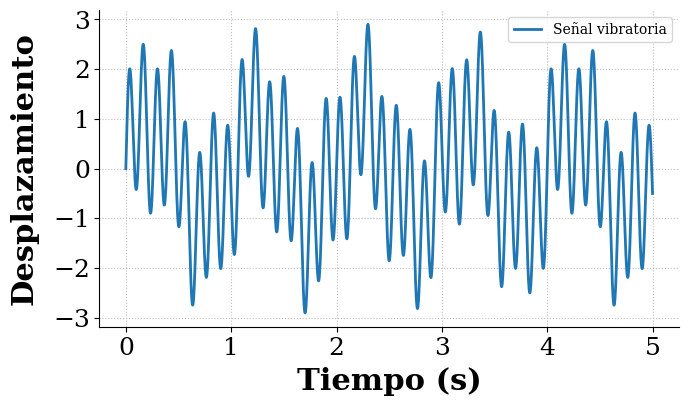

In [3]:
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

plt.xlabel('Tiempo (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Desplazamiento', family='serif', fontsize=22, weight='bold', labelpad=10)

plt.plot(t, vib_sig, linewidth=2, linestyle='-', label=r'Señal vibratoria')

leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, family='serif', fontsize=10)

plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
plt.savefig('OriginalSignal.pdf')

fig.set_size_inches(7, 4) # Resize the figure for better display in the notebook

> + Escribiremos una función que se encarga de gran parte del código repetitivo necesario para completar y trazar la FFT. 
> + La función, definida en la siguiente celda, se denomina ```compute_fft```. 
> + Esta se basa en la función ```fft``` del módulo ```fftpack``` de SciPy.

## Descripción de la función

> + La función centra los datos alrededor de cero. 
> + Aplica una ventana de Hanning a los datos.
> + Selecciona los componentes de valor real devueltos por la función SciPy ```fft```. 
> + Si ```plotflag``` es ```True```, entonces también generará automáticamente el gráfico de la magnitud FFT. 
> + Las razones para hacer estas cosas van un poco más allá de esta clase.
> + Por ahora, se puede pensar en ```compute_fft``` como si implementara el algoritmo FFT por ti.

In [4]:
def compute_fft(data, time, plotflag):
    ''' Calcula FFT para una respuesta vibratoria
    #
    # Inputs:
    #   time     = time array corresponding to the data
    #   data     = the response data array (only pass a single dimension/state at at time)
    #   plotflag = will plot the FFT if nonzero
    #   
    # Output:
    #   fft_freq = an array of the freqs used in the FFT
    #   fft_mag  = an array of the amplitude of the FFT at each freq in fft_freq
    #
    ######################################################################################
    '''
    
    from scipy.fftpack import fft
    
    # correct for any DC offset
    offset = np.mean(data) 

    # Get the sampling time
    sample_time = time[1] - time[0]
    
    # Get the length of the dataset
    n = len(data)

    # Calculate the FFT of the data, removing the offset and using a Hanning Window
    fft_mag = fft((data - offset) * np.hanning(len(data)))
    
    # Define the frequency range of the output
    fft_freq = np.linspace(0.0, 1.0 / (2.0*sample_time), int(np.ceil(n/2)))
    
    # Only return the "useful" part of the fft
    fft_mag = 2.0/n * np.abs(fft_mag[0:int(np.ceil(n/2))])
    
    # If plotflag is nonzero (True), plot the FFT before returning the magnitude and phase
    if plotflag:
        # Plot the relationship
        
        fig = plt.figure(figsize=(6,4))
        ax = plt.gca()
        plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
        plt.setp(ax.get_ymajorticklabels(),fontsize=18)
        plt.setp(ax.get_xmajorticklabels(),fontsize=18)
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        ax.grid(True, linestyle=':', color='0.75')
        ax.set_axisbelow(True)

        plt.xlabel('Frequencia (Hz)', fontsize=22, labelpad=8)
        plt.ylabel('FFT magnitud', fontsize=22, labelpad=10)
    
        plt.plot(fft_freq, fft_mag, linewidth=2, linestyle='-')
        
        # Adjust the page layout filling the page using the new tight_layout command
        plt.tight_layout(pad=0.5)
        plt.show()
    
    return fft_freq, fft_mag

In [5]:
# We can also use the FFT to get the natrual frequency
freq, mag = compute_fft(vib_sig, t, False)

> + Grafiquemos la FFT manualmente para que podamos escalar los ejes a nuestro gusto.

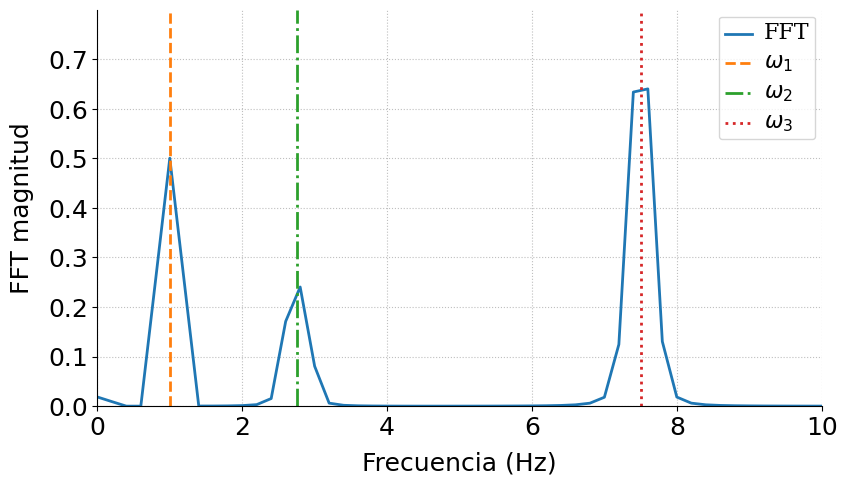

In [6]:
# Plot the relationship
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),fontsize=18)
plt.setp(ax.get_xmajorticklabels(),fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel('Frecuencia (Hz)',fontsize=18,labelpad=8)
plt.ylabel('FFT magnitud',fontsize =18,labelpad=10)


plt.plot(freq, mag, linewidth=2, linestyle='-', label = 'FFT')

# Let's also annotate the plot with vertical lines at each of the frequencies in our origianl signal
plt.plot([w1 / (2 * np.pi), w1 / (2 * np.pi)], [0, 1.25 * np.max(mag)], linewidth = 2, linestyle = '--', label = r'$\omega_1$')
plt.plot([w2 / (2 * np.pi), w2 / (2 * np.pi)], [0, 1.25 * np.max(mag)], linewidth = 2, linestyle = '-.', label = r'$\omega_2$')
plt.plot([w3 / (2 * np.pi), w3 / (2 * np.pi)], [0, 1.25 * np.max(mag)], linewidth = 2, linestyle = ':', label = r'$\omega_3$')

plt.xlim(0, 10)
plt.ylim(0, 1.25 * np.max(mag))

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, family='serif', fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('FFT_magnitude_5s.pdf',dpi=600)

fig.set_size_inches(9, 5) # Resize the figure for better display in the notebook

> + Se puede observar que la FFT tiene peaks en cada una de las frecuencias que usamos para construir la señal vibratoria original. 
> + Esto nos dice cuál es el contenido de frecuencia principal de esta señal.
> + La señal contiene componentes de frecuencia $\omega_1$, $\omega_2$ y $\omega_3$. 
> + Las amplitudes relativas de los peaks también nos dan información sobre cuál es la contribución relativa de cada una de las componentes de frecuencia. 
> + Observamos que tienen aproximadamente la misma proporción de $A_1$, $A_2$ y $A_3$.


## Análisis para mejorar resolución de frecuencia
> + Observamos que los peaks no son perfectos. 
> + Podemos mejorar la resolución de la FFT.
> + Para eso muestreamos los datos durante un período de tiempo más largo. 
> + Intentemos esto y veamos cómo cambia la gráfica FFT.
> + Definamos nuestra señal sobre 25 segundos antes. 
> + Dejaremos el número total de muestras igual.

In [7]:
t = np.linspace(0, 25, 5001)   # Time, 0-25s with 5001 samples in the range

# Now, define the 25s signal, using the same amplitudes and frequencies as the 5s version
vib_sig_25s = A1 * np.sin(w1 * t) + A2 * np.sin(w2 * t) + A3 * np.sin(w3 * t)

In [8]:
# Calculate the FFT for the 25s signal
freq_25s, mag_25s = compute_fft(vib_sig_25s, t, False)

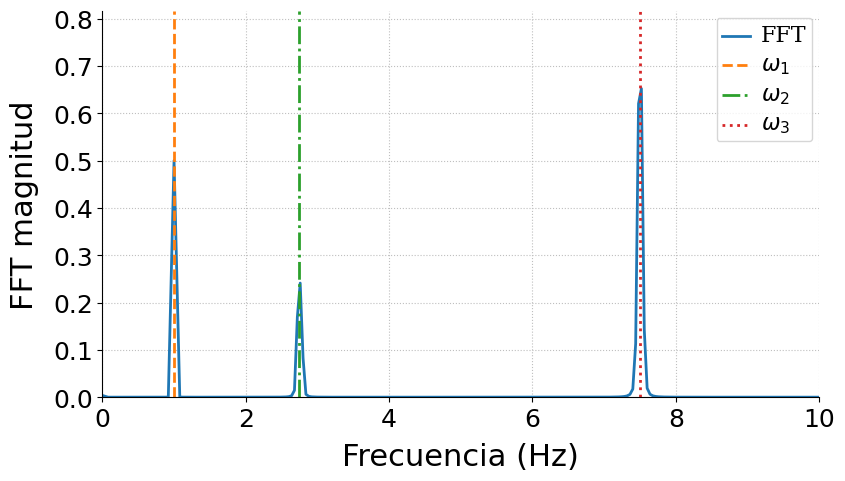

In [9]:
# Plot the relationshiop
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),fontsize=18)
plt.setp(ax.get_xmajorticklabels(),fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel('Frecuencia (Hz)', fontsize=22, labelpad=8)
plt.ylabel('FFT magnitud', fontsize=22, labelpad=10)


plt.plot(freq_25s, mag_25s, linewidth=2, linestyle='-', label = 'FFT')

# Let's also annotate the plot with vertical lines at each of the frequencies in our origianl signal
plt.plot([w1 / (2 * np.pi), w1 / (2 * np.pi)], [0, 1.25 * np.max(mag_25s)], linewidth = 2, linestyle = '--', label = r'$\omega_1$')
plt.plot([w2 / (2 * np.pi), w2 / (2 * np.pi)], [0, 1.25 * np.max(mag_25s)], linewidth = 2, linestyle = '-.', label = r'$\omega_2$')
plt.plot([w3 / (2 * np.pi), w3 / (2 * np.pi)], [0, 1.25 * np.max(mag_25s)], linewidth = 2, linestyle = ':', label = r'$\omega_3$')

plt.xlim(0, 10)
plt.ylim(0, 1.25 * np.max(mag_25s))

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, family='serif', fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('FFT_magnitude.pdf',dpi=600)

fig.set_size_inches(9, 5) # Resize the figure for better display in the notebook

> + Observamos ahora que los peaks son mucho más estrechos. 
> + La resolución de nuestros resultados ha mejorado porque muestreamos la señal durante una duración total más larga.
> + Ahora, vamos a agregar algo de ruido a la señal.
> + Esto nos permite simular el muestreo de datos del "mundo real". 
> + Todos los sensores (por ejemplo, un acelerómetro) siempre tendrán algo de ruido asociado. 
> + Usaremos la versión de 25 segundos de la señal y agregaremos ruido aleatorio.

In [10]:
noisy_signal = vib_sig_25s +  np.random.randn(len(vib_sig_25s))

> + Grafiquemos la señal vibratoria limpia y la que tiene ruido agregado para comparar. 
> + Sólo vamos a graficar 3 segundos para que las diferencias sean visibles.

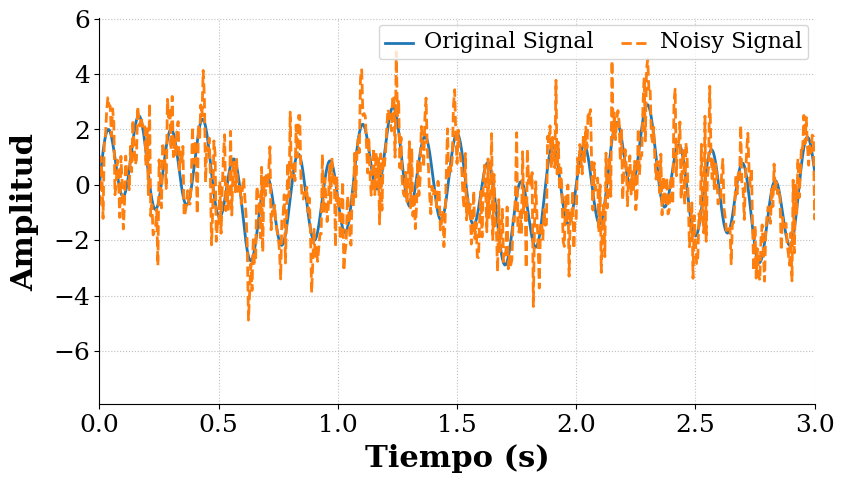

In [11]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Tiempo (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Amplitud', family='serif', fontsize=22, weight='bold', labelpad=10)

plt.plot(t, vib_sig_25s, linewidth=2, linestyle='-', label=r'Original Signal')
plt.plot(t, noisy_signal, linewidth=2, linestyle='--', label=r'Noisy Signal')

# uncomment below and set limits if needed
plt.xlim(0, 3)
# plt.ylim(0, 10)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 2, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, family='serif', fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('OriginalSignal.pdf')

fig.set_size_inches(9, 5) # Resize the figure for better display in the notebook

> + Ahora, repetiremos el análisis FFT en esta señal ruidosa y la compararemos con la versión "limpia" que calculamos antes.

In [12]:
# Calculate the FFT for the noisy 25s signal
freq_noisy, mag_noisy = compute_fft(noisy_signal, t, False)

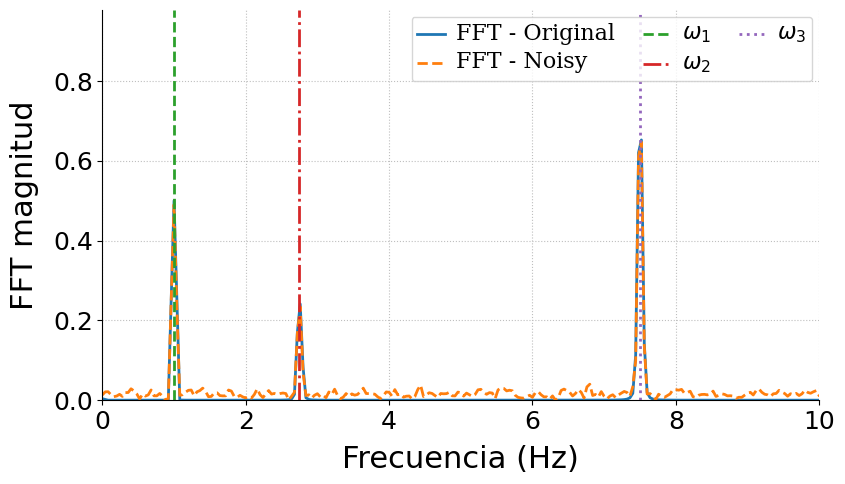

In [13]:
# Plot the relationshiop
#   Many of these setting could also be made default by the .matplotlibrc file
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),fontsize=18)
plt.setp(ax.get_xmajorticklabels(),fontsize=18)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

plt.xlabel('Frecuencia (Hz)', fontsize=22, labelpad=8)
plt.ylabel('FFT magnitud', fontsize=22, labelpad=10)


plt.plot(freq_25s, mag_25s, linewidth=2, linestyle='-', label = 'FFT - Original')
plt.plot(freq_noisy, mag_noisy, linewidth=2, linestyle='--', label = 'FFT - Noisy')

# Let's also annotate the plot with vertical lines at each of the frequencies in our origianl signal
plt.plot([w1 / (2 * np.pi), w1 / (2 * np.pi)], [0, 1.5 * np.max(mag_25s)], linewidth = 2, linestyle = '--', label = r'$\omega_1$')
plt.plot([w2 / (2 * np.pi), w2 / (2 * np.pi)], [0, 1.5 * np.max(mag_25s)], linewidth = 2, linestyle = '-.', label = r'$\omega_2$')
plt.plot([w3 / (2 * np.pi), w3 / (2 * np.pi)], [0, 1.5 * np.max(mag_25s)], linewidth = 2, linestyle = ':', label = r'$\omega_3$')

plt.xlim(0, 10)
plt.ylim(0, 1.5 * np.max(mag_25s))

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 3, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, family='serif', fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('FFT_magnitude.pdf',dpi=600)

fig.set_size_inches(9, 5) # Resize the figure for better display in the notebook

> + Ahora que la señal tiene algo de ruido, la FFT no produce un resultado tan "limpio". 
> + Sin embargo, todavía vemos peaks cerca de las tres frecuencias que utilizamos para generar la señal vibratoria original. 
> + Esta es la **magia** de la FFT.
> + Nos proporciona el contenido de frecuencia de la señal que se está procesando. 
> + **Para sistemas vibratorios en vibración libre, eso nos permite identificar las frecuencias naturales del sistema**.

> + Para ayudar a comprender mejor, revise su cuadernillo y cambie los valores de $\omega_1$, $\omega_2$, $\omega_3$, $A_1$, $A_2$ y $A_3$.
> + Qué observa en la FFT producto de los cambios? 
> + Los nuevos peaks en la FFT deberían seguir apareciendo.

> + Si desea explorar más la FFT, los tutoriales a continuación y los enlaces a los que se hace referencia en ellos tienen mucha más información:
* [Understanding the FFT Algorithm][0-3]
* [The Math Trick Behind MP3s, JPEGs, and Homer Simpson’s Face][0-4]
* [NI FFT Fundamentals][0-1]
* [SciPy Lectures Notes FFT][0-5]
* [Fourier transform for dummies][0-2]

[0-1]: http://zone.ni.com/reference/en-XX/help/372416B-01/svtconcepts/fft_funda/ "FFT Fundamentals (Sound and Vibration Measurement Suite) - Sound and Vibration Measurement Suite 7.0 Help - National Instruments"
[0-2]: http://nipunbatra.github.io/2016/01/fft/ "Fourier transform for dummies | Nipun Batra |"
[0-3]: http://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/ "Understanding the FFT Algorithm"
[0-4]: http://nautil.us/blog/the-math-trick-behind-mp3s-jpegs-and-homer-simpsons-face "The Math Trick Behind MP3s, JPEGs, and Homer Simpson’s Face - Facts So Romantic - Nautilus"
[0-5]: http://www.scipy-lectures.org/intro/scipy.html#fast-fourier-transforms-scipy-fftpack "1.5. Scipy : high-level scientific computing — Scipy lecture notes"

# Vibración forzada y resonancia

<br>
<div style="width:image width px; 
            font-size:100%; 
            text-align:center; 
            float: left; padding-left-right-top-bottom:0.5em;  
            border-style: solid; border-color: rgba(211, 211, 211, 0.1);
            background-color: rgba(0, 250, 250, 0.1);">
    <div style="padding: 3px; 
                width: 920px; 
                word-wrap: break-word; 
                text-align:justify;">
        <strong>Consideremos un sistema de 1DOF, no amortiguado, y que está siendo forzado. </strong>
        <br> 
        <br>
        <a> 
           <img src="resonance.png" align="center" width="500" height="400" style="padding-bottom:0.5em;"/> 
        </a>
    </div>
</div>

<br>
<br>

donde:
> + m = masa,
> + k = rigidez de un resorte,
> + x(t) = respuesta de desplazamiento de la masa,
> + f(t) = fuerza externa aplicada.

> + **Resonancia** es el término usado para denominar cuando la fuerza externa aplicada **coincide** con una frecuencia natural de un sistema. 
> + Durante vibración resonante, la respuesta del desplazamiento podría llegar a aumentar tanto que haría colapsar el sistema, o bien, que sufra algún tipo de falla. 

## Escribir la ecuación de movimiento del sistema.

> + Aplicar la transformada de Fourier a la ecuación de movimiento.

> + Recordar que:

\begin{align*}
		\large X(\omega) &=\large \mathscr{F}\left\{x(t)\right\},\\
		\large x(t) & = \large \mathscr{F}^{-1}\big\{X(\omega)\big\},\\
		\large x(t) & \large \overset{\mathscr{F}}{\longleftrightarrow} X(\omega)
\end{align*}

> + Propiedad de la transformada de Fourier de la derivada temporal. La transformada de Fourier de $\large \frac{dx(t)}{dt}$ es igual a: $j\omega\cdot X(\omega)$

\begin{align*}
		\large \mathscr{F}\left\{\frac{dx(t)}{dt}\right\} &=\large j\omega\cdot X(\omega)
\end{align*}

> + Demostremos esto:

\begin{align*}
        \large x(t) & =\large \mathscr{F}^{-1}\big\{X(\omega)\big\}\\ 
                    & =\large \frac{1}{2\pi} \int_{-\infty}^{\infty} X(\omega) \,e^{j\omega t}d\omega\quad \,\,\,{\huge/}\,\,\,\frac{d}{dt}\\
        \large \dot{x}(t)            & = \large \frac{d}{dt}\left( \frac{1}{2\pi}\int_{-\infty}^{\infty}X(\omega) \,e^{j\omega t}d\omega \right)\\
        & = \large \frac{1}{2\pi}\int_{-\infty}^{\infty}X(\omega)\frac{d}{dt}\left( e^{j\omega t} \right) d\omega\\
        & = \large \frac{1}{2\pi}\int_{-\infty}^{\infty}\left[j\omega \cdot X(\omega)\right]e^{j\omega t} d\omega
\end{align*}

> + Así,
\begin{align*}
    \large \dot{x}(t)            & = \large \mathscr{F}^{-1}\big\{j\omega \cdot X(j\omega)\big\}
\end{align*}
> + Por lo tanto,
\begin{align*}
        \large \dot{x}(t)            & = \large \mathscr{F}^{-1}\big\{j\omega \cdot X(j\omega)\big\}\quad \,\,\,{\huge/}\mathscr{F}\left\{\cdot\right\}\\
        \large \mathscr{F}\left\{\dot{x}(t)\right\} & = \large j\omega \cdot X(j\omega)
\end{align*}

> +  De igual manera se demuestra que:
\begin{align*}
        \large \mathscr{F}\left\{\ddot{x}(t)\right\} & = \large \left(j\omega\right)^{2} \cdot X(j\omega)
\end{align*}

> + Y, que en general,
\begin{align*}
        \large \mathscr{F}\left\{\frac{d^{n}x(t)}{dt^{n}}\right\} & = \large \left(j\omega\right)^{n} \cdot X(j\omega)
\end{align*}

> + Ecuación de movimiento:

\begin{align*}
m\ddot x & = \sum F\\
m\ddot x & = - k(x - x_{0}) + f(t) \\
m\ddot x + k x& = f(t)
\end{align*}

\begin{align*}
\large m\cdot \ddot{x}(t)+k\cdot x(t)&=\large f(t) \quad \,\,\,{\huge/}\mathscr{F}\left\{\cdot\right\}
\end{align*}

\begin{align*}
\left|H(\omega)\right| & = \frac{X(\omega)}{F(\omega)/k} \\
              & = \frac{1}{1-\frac{\omega^{2}}{\omega_{0}^{2}}}
\end{align*}

+ donde $\omega_{0}=\sqrt{k/m}$ es la frecuencia natural del sistema principal. 
+ Graficar la magnitud $H(\omega)$ en función de una frecuencia normalizada.

In [14]:
def create_fig(w1, w, H):
    
    fig = plt.figure(figsize = (6,4))
    
    plt.plot(r, np.abs(H), linestyle = '--', 
            label=r'$ H(\omega)=\frac{1}{ 1 - \frac{\omega^{2}}{\omega_{1}^{2}}} $',
            c="red", 
            lw=2)
    plt.xlim(0.6,2.0)
    plt.ylim(0.0,5.0)
    plt.grid(True,linestyle=':',color='0.75')
    plt.legend()
    plt.xlabel(r'Frecuencia normalizada $\left(r = \frac{\omega}{\omega_n}\right)$',family='serif',fontsize=22,weight='bold',labelpad=5)
    plt.ylabel(r'$ |H(r)| $',family='serif',fontsize=22,weight='bold',labelpad=15)
    plt.xticks([0,1],['0','$r = 1$'])
    fig.set_size_inches(7,4) # Resize the figure for better display in the notebook

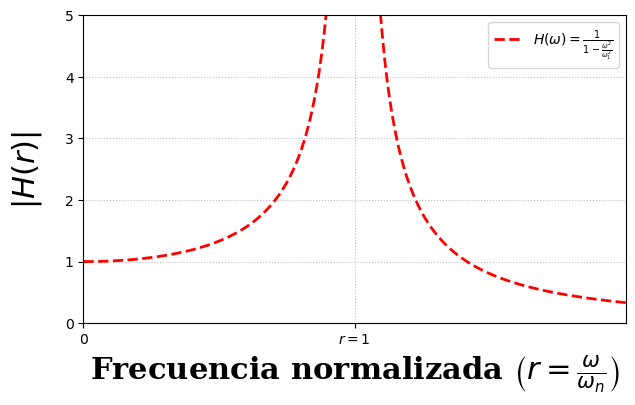

In [15]:
w    = np.linspace(0,100,10000)

m1   = 1000
k1   = 20000.0
w1   = np.sqrt(k1/m1)

r     = w/w1
H_abs = 1/(1-r**2) # X1(w)/(F1(w)/k1)

create_fig(w1,w,H_abs)